In [29]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
import yfinance as yf
import matplotlib.pyplot as plt
sb.set()

In [24]:
import yfinance as yf

# Fetch data for Amazon (AMZN)
amzn = yf.download('AMZN')
print(amzn)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...                ...         ...         ...         ...         ...   
2024-08-07  166.550003  167.580002  161.429993  162.770004  162.770004   
2024-08-08  165.169998  166.690002  162.550003  165.800003  165.800003   
2024-08-09  166.399994  168.550003  165.850006  166.940002  166.940002   
2024-08-12  168.139999  168.550003  166.110001  166.800003  166.800003   
2024-08-13  167.845001  171.033997  167.100006  170.229996  170.229996   

                Volume  
Date        

In [27]:
# Download historical data for Amazon (AMZN)
amzn = yf.download('AMZN', start='2020-01-01', end='2023-12-31')

# Display the first few rows of the data
amzn.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000


Step 4: Plot the Closing Prices

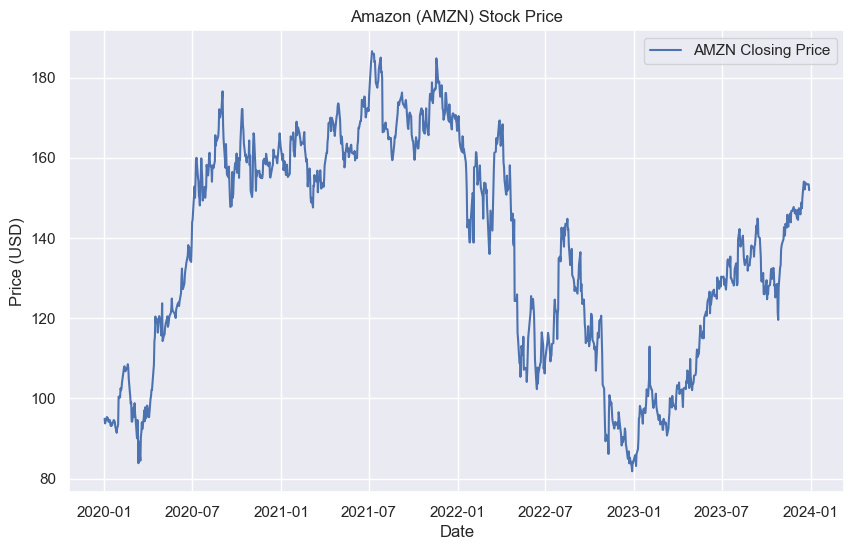

In [30]:
# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(amzn['Close'], label='AMZN Closing Price')
plt.title('Amazon (AMZN) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Step 5: Calculate Moving Averages

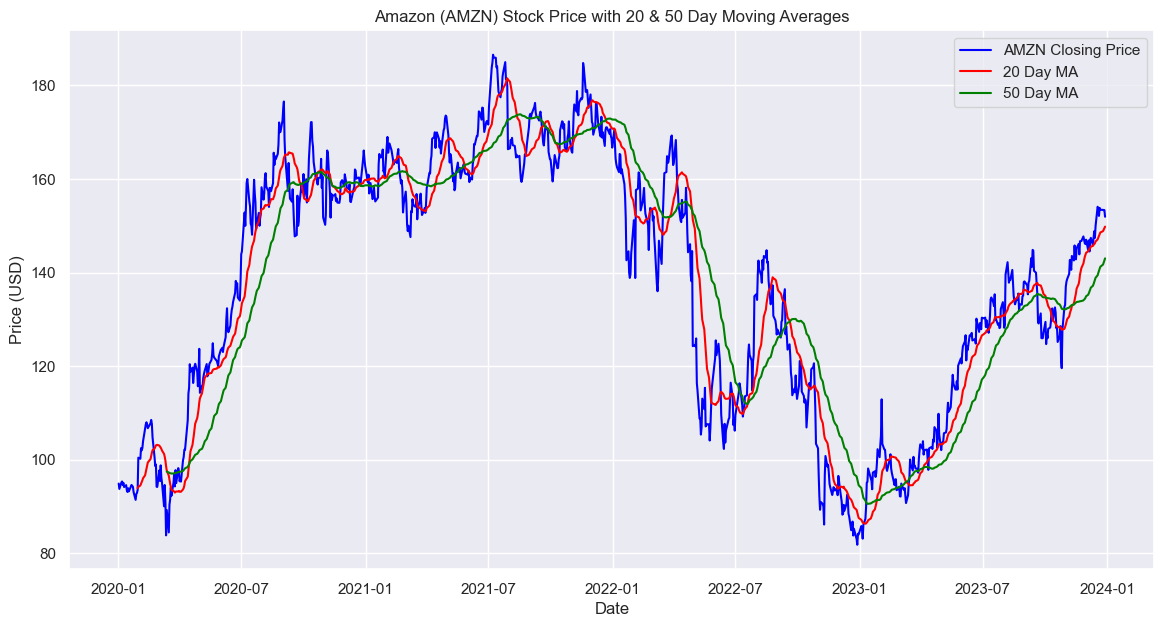

In [31]:
# Calculate the 20-day and 50-day moving averages
amzn['20 Day MA'] = amzn['Close'].rolling(window=20).mean()
amzn['50 Day MA'] = amzn['Close'].rolling(window=50).mean()

# Plot the closing price along with the moving averages
plt.figure(figsize=(14, 7))
plt.plot(amzn['Close'], label='AMZN Closing Price', color='blue')
plt.plot(amzn['20 Day MA'], label='20 Day MA', color='red')
plt.plot(amzn['50 Day MA'], label='50 Day MA', color='green')
plt.title('Amazon (AMZN) Stock Price with 20 & 50 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Step 6: Calculate and Plot Daily Returns

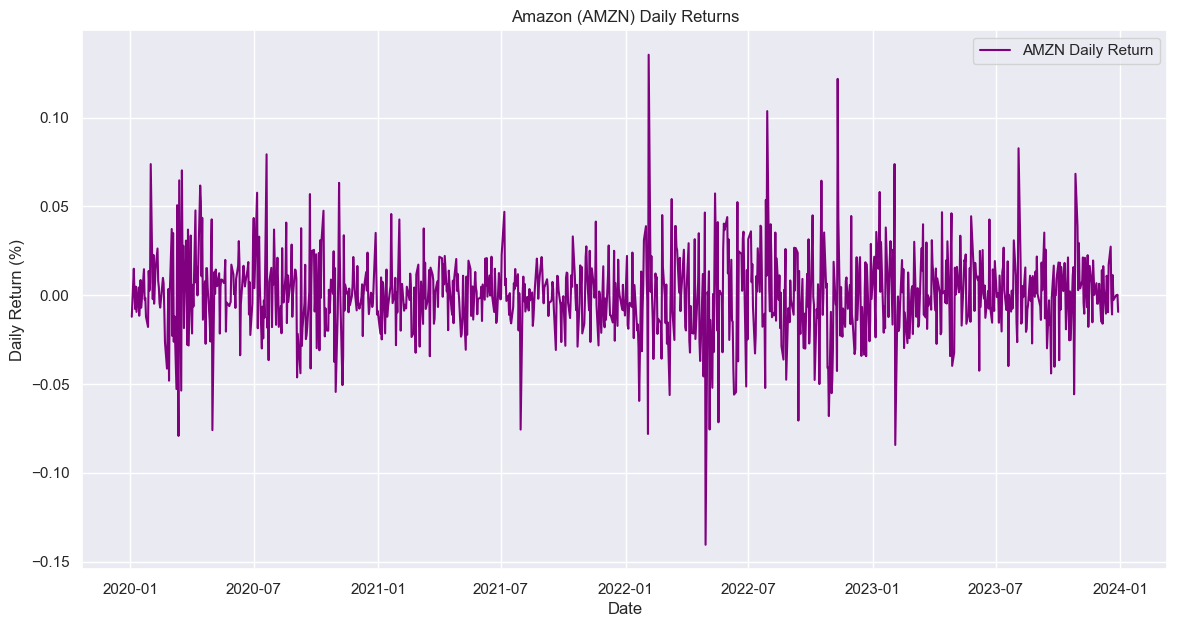

count    1005.000000
mean        0.000750
std         0.023741
min        -0.140494
25%        -0.012159
50%         0.000782
75%         0.013327
max         0.135359
Name: Daily Return, dtype: float64

In [32]:
# Calculate daily returns
amzn['Daily Return'] = amzn['Close'].pct_change()

# Plot the daily returns
plt.figure(figsize=(14, 7))
plt.plot(amzn['Daily Return'], label='AMZN Daily Return', color='purple')
plt.title('Amazon (AMZN) Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()

# Display statistics of daily returns
amzn['Daily Return'].describe()


Step 7: Plot a Histogram of Daily Returns

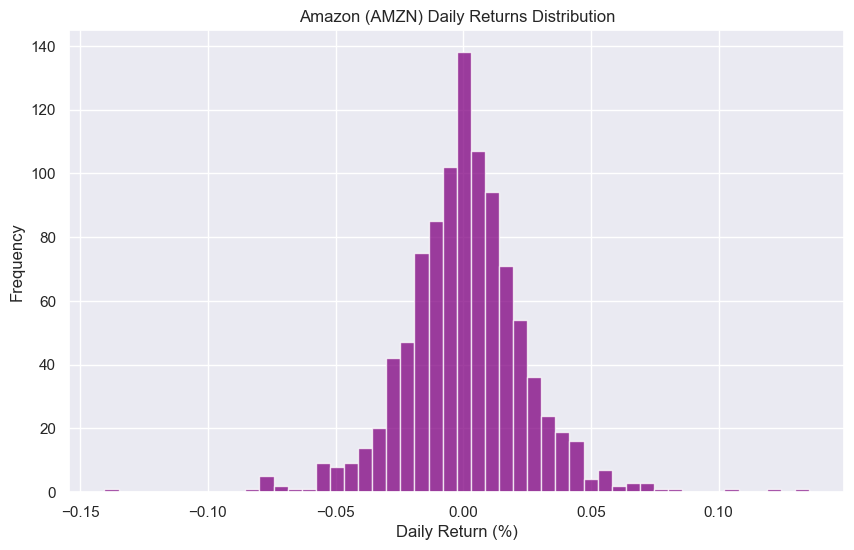

In [33]:
# Plot a histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(amzn['Daily Return'].dropna(), bins=50, color='purple', alpha=0.75)
plt.title('Amazon (AMZN) Daily Returns Distribution')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Step 8: Compare Amazon with Other Stocks

[*********************100%%**********************]  3 of 3 completed


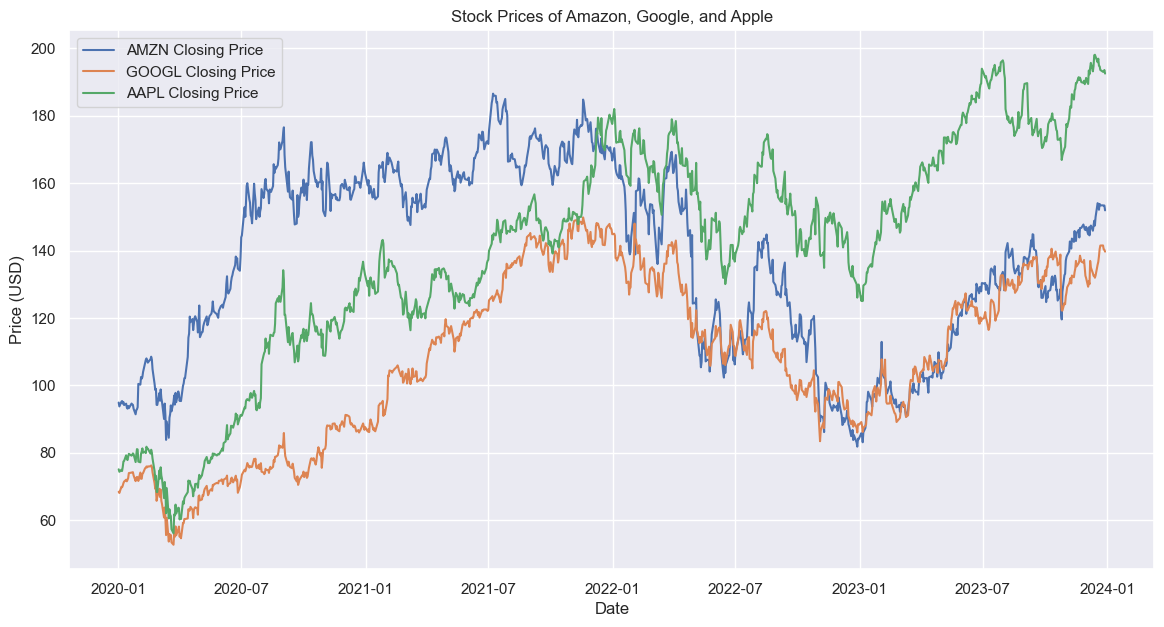

In [34]:
# Download data for Google and Apple
tickers = ['AMZN', 'GOOGL', 'AAPL']
stocks = yf.download(tickers, start='2020-01-01', end='2023-12-31')['Close']

# Plot closing prices of Amazon, Google, and Apple
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(stocks[ticker], label=f'{ticker} Closing Price')

plt.title('Stock Prices of Amazon, Google, and Apple')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
